# Project description

The first task is to help optimize marketing expenses. 

### Given:
- Server logs with data on Yandex.Afisha visits from January 2017 through December 2018
- Dump file with all orders for the period
- Marketing expenses statistics

### What needs to be studied:

- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

# Table of contents

1. [Step 1. Download the data and prepare it for analysis](#download)
    1. [First Dataset - Costs (data on marketing expenses)](#dataset1)
    2. [Conclusion](#conclusion1)
    3. [Second Dataset - Orders_log (data on orders)](#dataset2)
    4. [Conclusion](#conclusion2)
    5. [Third Dataset - Visits_log (server logs with data on website visits)](#dataset3)
    6. [Conclusion](#conclusion3)
    7. [Preparing The Data](#preparingdata) 
    8. [Columns](#columns)
2. [Step 2. Make reports and calculate metrics](#reports)
   1. [1. Product](#product)
   2. [2. Sales](#sales)
   3. [Conclusion](#conclusion4)
   4. [3. Marketing](#Marketing)
   5. [Conclusion](#conclusion5)
3. [Step 3. Testing Hypothesis ](#hypothesus)
   1. [Conclusion](#conclusion6)
5. [Project Conclusion](#conclusion7)  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sb
from scipy import stats as st
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as mp
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

In [2]:
from plotly import graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers;

In [ ]:
!pip install seaborn==0.11.0

## Step 1. Download the data and prepare it for analysis <a name="donload"></a>

### First Dataset - Costs (data on marketing expenses) <a name="dataset1"></a>

In [4]:
costs = pd.read_csv('/Users/annaperkas/Downloads/costs_us.csv')
costs.head();

In [5]:
costs.tail();

In [6]:
costs.sample()

,source_id,dt,costs
494,2,2017-10-10,133.24


In [7]:
costs.shape

(2542, 3)

In [8]:
costs.nsmallest(5, 'costs') 

,source_id,dt,costs
2235,10,2017-07-27,0.54
1755,5,2018-03-31,0.70
1379,4,2018-03-18,0.83
2253,10,2017-08-14,1.22
1431,4,2018-05-11,1.31


In [9]:
costs.nlargest(5,'costs')

,source_id,dt,costs
902,3,2017-11-24,1788.28
919,3,2017-12-11,1061.18
1005,3,2018-03-07,996.15
853,3,2017-10-06,980.52
936,3,2017-12-28,858.28


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [11]:
print(costs.duplicated().sum())

0


In [12]:
costs['costs'].value_counts()

16.25     3
50.77     3
12.87     3
6.35      3
16.81     3
         ..
193.39    1
13.68     1
91.65     1
45.10     1
62.25     1
Name: costs, Length: 2396, dtype: int64

In [13]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [14]:
costs.isna().mean().round(4) * 100

source_id    0.0
dt           0.0
costs        0.0
dtype: float64

In [15]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

### Conclusion <a name="conclusion1"></a>

The shape pf cost dataset: 3 columns and 2542 rows.

The 5 smallest values fir the cost column range from 0.54 to 1.31. The biggest 5 values range from 885.28 to 1788. Based on the somewhat consistent distribution relative to the value size, the column does not appear to have serious outliers. 

The column that contains dates needs to be converted to date time format as currently it is listed object. 

The cost dataset does not have duplicates or NaNs, but has repeated numerical values.


### Second Dataset - Orders_log (data on orders) <a name="dataset2"></a>

In [16]:
orders_log = pd.read_csv('/Users/annaperkas/Downloads/orders_log_us.csv')
orders_log.head(10);

In [17]:
orders_log.tail();

In [18]:
orders_log.sample()

,Buy Ts,Revenue,Uid
10880,2017-10-05 18:11:00,3.05,17420375917464236090


In [19]:
orders_log.shape

(50415, 3)

In [20]:
orders_log.nsmallest(5,'Revenue') 

,Buy Ts,Revenue,Uid
1802,2017-06-22 18:19:00,0.0,17030528792926543083
2787,2017-07-07 15:54:00,0.0,10281425020415612933
4783,2017-08-02 14:54:00,0.0,184148767273119549
5095,2017-08-09 14:48:00,0.0,5603453646174104178
5863,2017-08-23 13:43:00,0.0,5603453646174104178


In [21]:
orders_log.nlargest(5,'Revenue')

,Buy Ts,Revenue,Uid
23244,2017-12-10 20:17:00,2633.28,5539673724080479777
36522,2018-02-23 08:54:00,1236.28,11149926373378902217
36682,2018-02-24 09:25:00,1221.37,11149926373378902217
23165,2017-12-10 13:04:00,1195.64,5539673724080479777
24607,2017-12-17 18:06:00,1109.10,11149926373378902217


In [22]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [23]:
print(orders_log.duplicated().sum())

0


In [24]:
orders_log['Uid'].value_counts()

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
10123118655365033769      1
17398492294358629398      1
15974676665349104064      1
16705253310465048548      1
9505264890679494151       1
Name: Uid, Length: 36523, dtype: int64

In [25]:
orders_log.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [26]:
orders_log.isna().mean().round(4) * 100

Buy Ts     0.0
Revenue    0.0
Uid        0.0
dtype: float64

In [27]:
orders_log.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

### Conclusion  <a name="conclusion2"></a>

The revenue column of the orders_log dataset has 3 columns and 50415 rows.The smallest values are zeros which can be filtered out as further analysis is focused on cases where a user either purchased something or did not and zeros might indicate the absence of activity or lack of data.

The largest 5 values range from 1109.10 to 2633.28.In this dataset the dates column also needs to be changed to datetime.

The orders_log does not have duplicates or NaNs


### Third Dataset - Visits_log (server logs with data on website visits)  <a name="dataset3"></a>

In [28]:
visits_log = pd.read_csv('/Users/annaperkas/Downloads/visits_log_us.csv')
visits_log.head();

In [29]:
visits_log.tail();

In [30]:
visits_log.sample()

,Device,End Ts,Source Id,Start Ts,Uid
256168,desktop,2018-05-20 16:31:00,3,2018-05-20 16:20:00,199111786914957873


In [31]:
visits_log.shape

(359400, 5)

In [32]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [33]:
print(visits_log.duplicated().sum())

0


In [34]:
visits_log['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [35]:
visits_log.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [36]:
visits_log['Source Id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

In [37]:
visits_log.isna().mean().round(4) * 100

Device       0.0
End Ts       0.0
Source Id    0.0
Start Ts     0.0
Uid          0.0
dtype: float64

In [38]:
visits_log.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

### Conclusion <a name="conclusion3"></a>

The dataset has 5 columns and 359400 rows. The dates columns need to be converted from object type to dataset. There are more “desktop” values than “touch” in the device column. There are no NaNs or null values.

### Preparing The Data  <a name="preparingdata"></a>

In [39]:
visits_log.columns = map(str.lower, visits_log.columns)
#visits_log.head() #test

In [40]:
orders_log.columns = map(str.lower, orders_log.columns)
#orders_log.head()#test

In [41]:
visits_log['end_ts'] = visits_log['end ts']
visits_log['start_ts'] = visits_log['start ts']
visits_log['user_id'] = visits_log['uid']

In [42]:
orders_log['order_datetime'] = orders_log['buy ts'] 
orders_log['user_id'] = orders_log['uid']

In [43]:
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'], format ="%Y-%m-%d %H:%M")
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'], format="%Y-%m-%d %H:%M")
orders_log['order_datetime'] = pd.to_datetime(visits_log['start_ts'], format ="%Y-%m-%d %H:%M")
costs['date'] = pd.to_datetime(costs['dt'], format ="%Y-%m-%d %H:%M")

In [44]:
visits_log['session_year'] = visits_log['start_ts'].dt.year
visits_log['session_month'] = visits_log['start_ts'].dt.month

In [45]:
orders_log['order_month'] = orders_log['order_datetime'].dt.month
orders_log['order_year'] = orders_log['order_datetime'].dt.year

In [46]:
costs['order_date'] = costs['date'].dt.year

In [47]:
costs['order_month'] = costs['date'].dt.month

In [48]:
costs['month'] = costs['dt'].astype('datetime64[M]') 
orders_log['order_datetime'] = orders_log['order_datetime'].astype('datetime64[M]')

new_date, new_time = zip(*[(d.date(), d.time()) for d in orders_log['order_datetime']]) 
orders_log = orders_log.assign(orders_month = new_date, orders_time= new_time)
#orders_log.head() #test


In [49]:
new_date, new_time = zip(*[(d.date(), d.time()) for d in visits_log['start_ts']]) 
visits_log = visits_log.assign(start_date = new_date, start_time = new_time)
#visits_log.head() #test

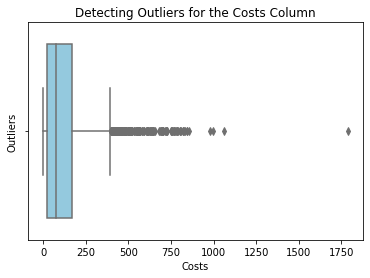

In [50]:
plt.title('Detecting Outliers for the Costs Column')
sns.boxplot(x=costs['costs'],color= 'SkyBlue').set(xlabel='Costs', ylabel='Outliers')

costs = costs.query("costs < 900")

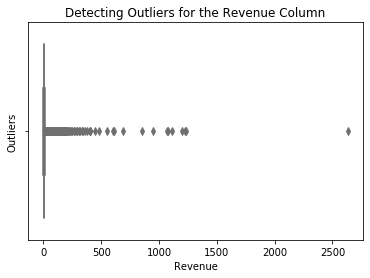

In [51]:
plt.title('Detecting Outliers for the Revenue Column')
sns.boxplot(x=orders_log['revenue'],color= 'SkyBlue').set(xlabel='Revenue', ylabel='Outliers')

removed_outliers_costs_1 = orders_log['revenue'].between(orders_log['revenue'].quantile(.05), orders_log['revenue'].quantile(.95))

orders_log = orders_log.query("1 < revenue < 1500")

In [52]:
removed_outliers_costs_1.sum()
percentage_of_outliers_1 = 35495 * 100 / 359400 
percentage_of_outliers_1

9.876182526432943

According to the graph for the "revenue" column, there are outliers around 1500 threshold which were subsequently removed. There were nearly 10 percent of relevant outliers in the initial data.

### Columns <a name="columns"></a>

The dataset has five columns and 359400 rows. The dates columns need to be converted from object type to dataset. There are more “desktop” values than “touch” in the device column. There are no NaNs or null values.


The column names in the visits_log and orders_log are renamed and turned into lowercase for uniformity and neatness in analyzing. The dates columns from multiple data frames are converted to DateTime. The zeros from the revenue column of orders_log dataframe are filtered out. 

Some columns are converted to DateTime month to plot matrixes.

Outliers are removed from the “costs” column of the costs dataframe and “revenue” column from the costs dataframe after detecting them with boxplots’ help. The data frames were not merged at this stage because they require separate analysis. 

## Step 2. Make reports and calculate metrics  <a name="reports"></a>

Here it is essential to understand the nature of the product. Yandex Afisha is a Russian speaking service that offers ticket purchasing to theaters, movies, exhibitions, etc. It also provides a search for different events and comprehensive descriptions. The service is offered in Russia's biggest cities.

https://afisha.yandex.ru/moscow

https://ru.wikipedia.org/wiki/Яндекс.Афиша

### 1. Product  <a name="product"></a>

In [53]:
visits_log['session_year'] = visits_log['start_ts'].dt.year
visits_log['session_month'] = visits_log['start_ts'].dt.month
visits_log['session_week']  = visits_log['start_ts'].dt.week
visits_log['session_date'] = visits_log['start_ts'].dt.date

dau_total = visits_log.groupby('session_date').agg({'user_id': 'nunique'}).mean()
print('DAU Total',dau_total)


DAU Total user_id    907.991758
dtype: float64


[Text(0, 0.5, 'Values'), Text(0.5, 0, 'Day'), Text(0.5, 1.0, 'DAU')]

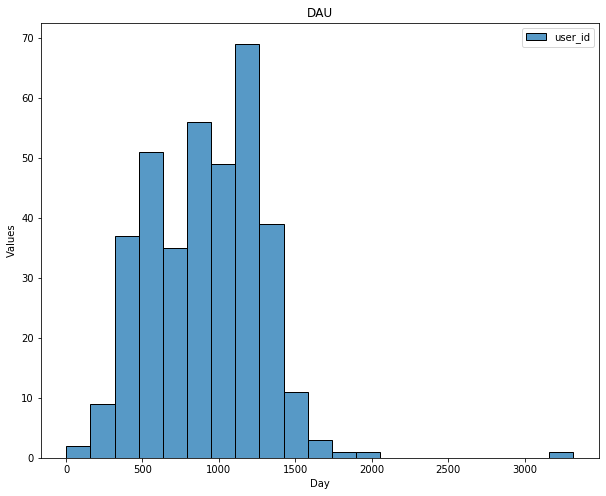

In [54]:
dau_total_day = visits_log.groupby('session_date').agg({'user_id': 'nunique'})

plt.figure(figsize=(10,8)) 

sns.histplot(dau_total_day,color='Lime').set(title='DAU', xlabel='Day', ylabel='Values')

In [55]:
wau_total = visits_log.groupby(['session_year', 'session_week']).agg({'user_id': 'nunique'}).mean()
print('WAU Total',wau_total)

WAU Total user_id    5716.245283
dtype: float64


[Text(0, 0.5, 'Values'), Text(0.5, 0, 'Weeks'), Text(0.5, 1.0, 'WAU')]

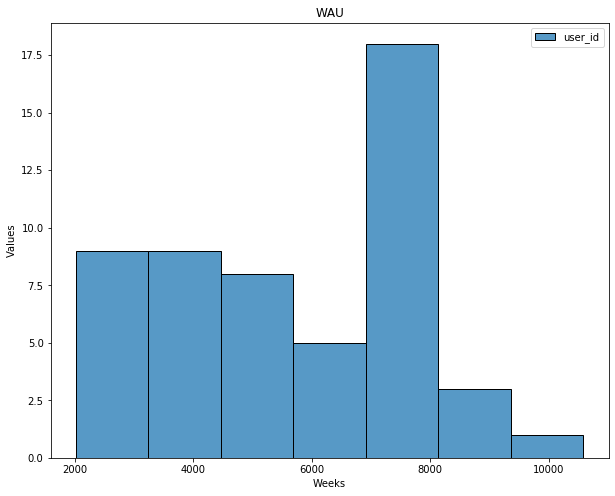

In [56]:
wau_total_week = visits_log.groupby(['session_year', 'session_week']).agg({'user_id': 'nunique'})
plt.figure(figsize=(10,8))
sns.histplot(wau_total_week).set(title='WAU', xlabel='Weeks', ylabel='Values')

In [57]:
mau_total = visits_log.groupby(['session_year', 'session_month']).agg({'user_id': 'nunique'}).mean()
print('MAU Total',mau_total)

MAU Total user_id    23228.416667
dtype: float64


[Text(0, 0.5, 'Values'), Text(0.5, 0, 'Months'), Text(0.5, 1.0, 'MAU')]

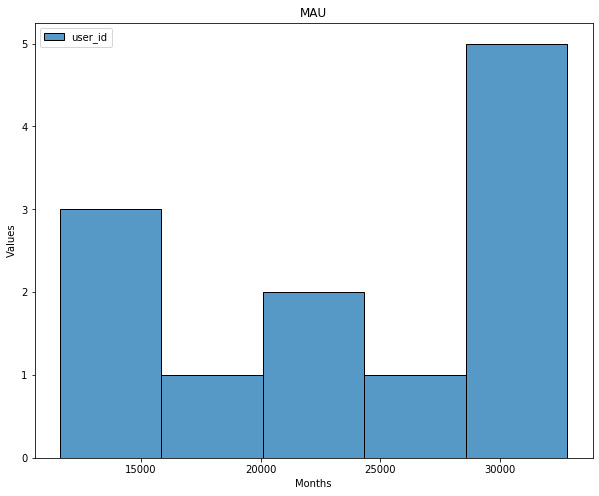

In [58]:
mau_total_month = visits_log.groupby(['session_year', 'session_month']).agg({'user_id': 'nunique'})
mau_total_month.reset_index()
plt.figure(figsize=(10,8))
sns.histplot(mau_total_month,color='Lime').set(title='MAU', xlabel='Months', ylabel='Values')

In [59]:
#calculating sticky values

sticky_wau = dau_total/wau_total*100
print(sticky_wau)
sticky_mau = dau_total/mau_total*100
print(sticky_mau)

user_id    15.884409
dtype: float64
user_id    3.90897
dtype: float64


Based on the metrics for DAU, WAU and MAU we can conclude that the users are interested in the product,the volume of active users on a daily basis is suffecient, however, by the way how the graphs for MAU and WAU react, it looks like users frequenly change without sticking with the product. It can also be seen by the metrics for "sticky wau" and "sticky mau". 

Now it is crucial to consider the nature of the platform. It offers info and tickets to various goings-on in Russian cities. How much people can really "stick" with the product in this regard. It is not like, for example, Instagram, where users can be constantly engaged with the platform. In this case, users make purchases or look into making purchases when they plan to have, for example, a night out, and generally speaking, it does not happen every day of the week and does not have continuity.

In [60]:
#Find the ASL metric (average session length).

visits_log['session_duration_sec'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds
visits_log['session_duration_sec']
visits_log['session_duration_min'] = visits_log['session_duration_sec'] / 60 
visits_log['session_duration_min'].mean() #test

10.725108143202156

The average session length is just a bit above 10 minutes which is pretty good, it means that the users are interested in what the service has to offer overall and they dont immediately bounce.

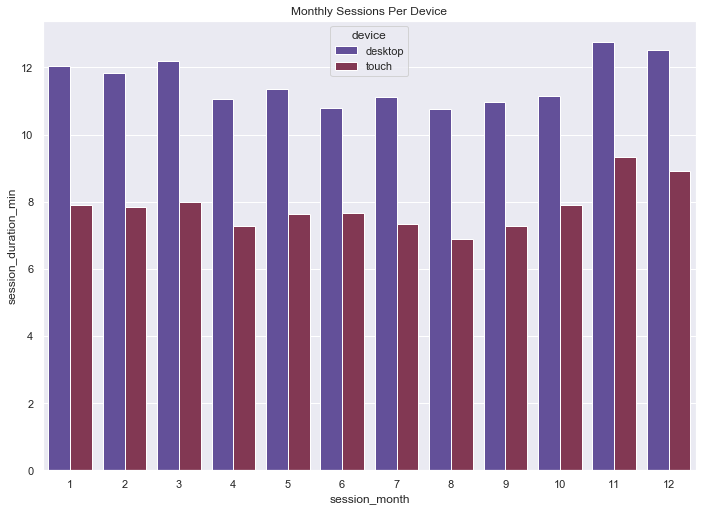

In [94]:
visits_grouped = visits_log.groupby(['session_month', 'device'])[['session_duration_min']].mean().reset_index()
visits_grouped

plt.title('Monthly Sessions Per Device')

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="session_month", y="session_duration_min", hue="device", data=visits_grouped, palette='twilight')


The users overwhelmingly choose to browse on desktop as opposed to touch. The metric also shows which months are more active and less active. It makes sense that during the summer months the servce is less popular because there is less going on in terms of cultural events.

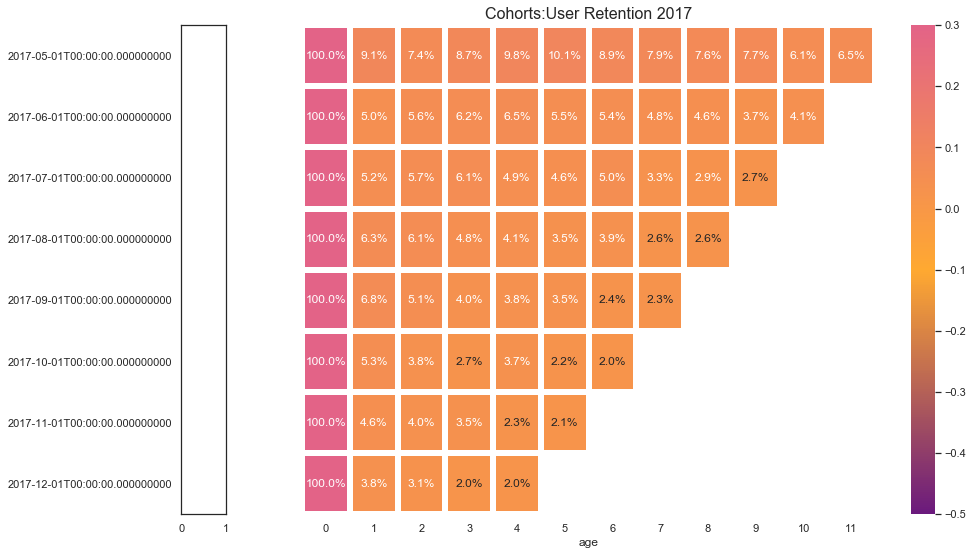

In [62]:
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])
first_activity_date = visits_log.groupby(['user_id'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'

user_activity = visits_log.join(first_activity_date,on='user_id')
user_activity['first_activity_date'] = pd.to_datetime(user_activity['first_activity_date']).dt.normalize()

user_activity['start_ts'] = user_activity['start_ts'].astype('datetime64[M]')
user_activity['first_activity_month'] = pd.to_datetime(user_activity['first_activity_date'],\
                                                       unit='d') - pd.to_timedelta\
(user_activity['first_activity_date'].\
 dt.dayofweek, unit='d')

user_activity['cohort_lifetime'] = user_activity['start_ts'] - user_activity['first_activity_month']
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1,'M')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].astype(int)
user_activity.head()

cohorts = user_activity.groupby(['first_activity_month','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts['first_activity_month'] = cohorts['first_activity_month'].astype('datetime64[M]')


initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']
cohorts.head()


cohorts_2017 = cohorts[cohorts['first_activity_month'].dt.year == 2017].reset_index()
cohorts_2017.head() 

retention_pivot_2017 = cohorts_2017.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

cohort_size = retention_pivot_2017.iloc[:,0]
retention_matrix = retention_pivot_2017.divide(cohort_size, axis = 0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(15, 9), sharey=True, gridspec_kw={'width_ratios': [0.5, 8]})
    
    def create_color(r, g, b):
        return [r/256, g/256, b/256]
 
    def get_custom_color_palette():
        return LinearSegmentedColormap.from_list("", ['#6a197d','#ffa931','#e36387'
 
])
         #retention matrix
    cmap = get_custom_color_palette()    
    sns.heatmap(retention_matrix,  
                annot=True, 
                fmt='.1%', 
                linewidth = 5,
                cmap=cmap, 
                vmin=-0.5, vmax=0.3,
                ax=ax[1])
    ax[1].set_title('Cohorts:User Retention 2017', fontsize=16)
    ax[1].set(xlabel='age',
              ylabel='')    

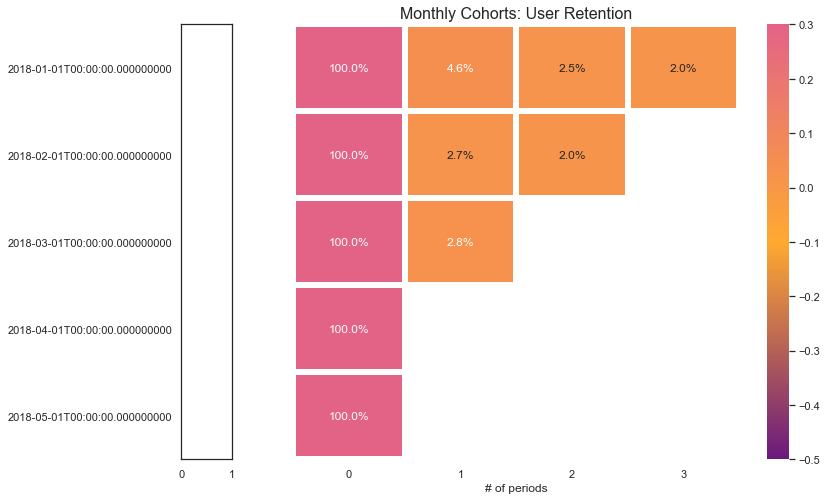

In [63]:
#retention rate for 2018

cohorts_2018 = cohorts[cohorts['first_activity_month'].dt.year == 2018].reset_index()
cohorts_2018.head()

retention_pivot_2018 = cohorts_2018.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')   

cohort_size = retention_pivot_2018.iloc[:,0]
retention_matrix = retention_pivot_2018.divide(cohort_size, axis = 0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    def create_color(r, g, b):
        return [r/256, g/256, b/256]
 
    def get_custom_color_palette():
        return LinearSegmentedColormap.from_list("", ['#6a197d','#ffa931','#e36387'
 
])    

    # retention matrix
    cmap = get_custom_color_palette()   
    sns.heatmap(retention_matrix,  
                annot=True, 
                fmt='.1%', 
                linewidth = 5,
                cmap=cmap,
                vmin=-0.5, vmax=0.3,
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

### 2. Sales <a name="sales"></a>

In [64]:
#calculating the number of sessions per each user

sessions_per_user = visits_log.groupby(['session_year', 'session_month']).agg({'user_id': ['count','nunique']})
sessions = sessions_per_user.reset_index()
sessions.columns = ['sessions_year','sessions_month','n_sessions', 'n_users']
sessions

,sessions_year,sessions_month,n_sessions,n_users
0,2017,6,16505,13259
1,2017,7,17828,14183
2,2017,8,14355,11631
3,2017,9,23907,18975
4,2017,10,37903,29692
5,2017,11,43969,32797
6,2017,12,41983,31557
7,2018,1,36939,28716
8,2018,2,37182,28749
9,2018,3,35679,27473


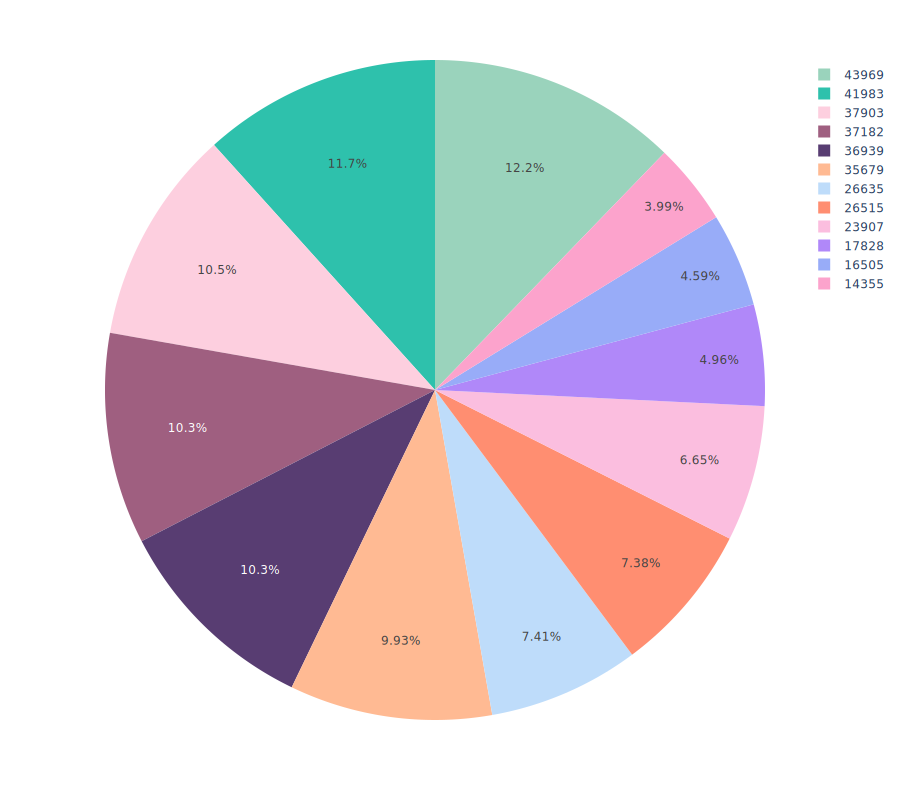

In [65]:
fig1 = px.pie(sessions, values='n_sessions', names='n_sessions', color='sessions_month',
color_discrete_map={12:'#2ec1ac',
1:'#583d72', 2:'#9f5f80', 3:'#ffba93', 4:'#ff8e71',5:'#bedcfa',
6:'#98acf8', 7:'#b088f9', 8:'#fca3cc', 9:'#fbbedf', 10:'#fdcfdf',
                   11:'#9ad3bc'})
fig1.show(renderer="svg",height=800,width=900)

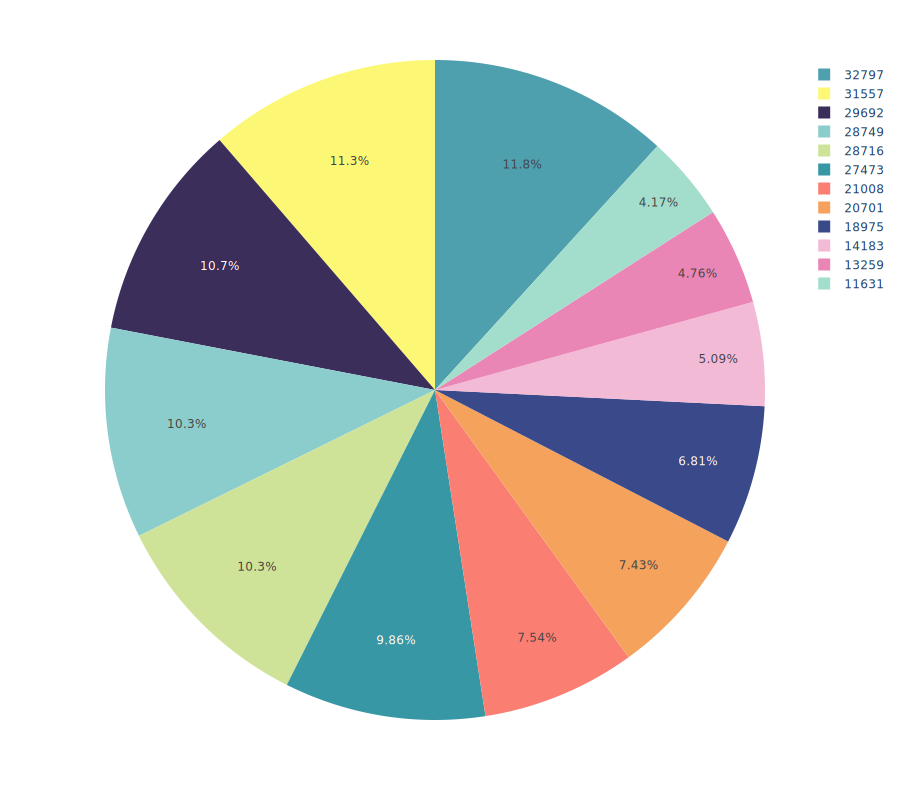

In [66]:
fig2 = px.pie(sessions, values='n_users', names='n_users', color='sessions_month',
color_discrete_map={12:'#fcf876',
1:'#cee397', 2:'#8bcdcd', 3:'#3797a4', 4:'#fa7f72',5:'#f5a25d',
6:'#ea86b6', 7:'#f3bad6', 8:'#a3ddcb', 9:'#394989', 10:'#3b2e5a',
                   11:'#4ea0ae'})
fig2.show(renderer="svg",height=800,width=900)

Both pie charts demonstrate that the Winter and Fall months are the busiest when it comes to visits and orders like we saw on the chart for devices.

In [67]:
purchase_per_user = orders_log.groupby(['order_year','order_month']).agg({'user_id':['count','nunique']})
purchase_per_user.columns = ['n_sessions','n_users']
purchase_per_user['buy_per_user'] = purchase_per_user['n_sessions'] / purchase_per_user['n_users']
purchase_per_user.reset_index() 

,order_year,order_month,n_sessions,n_users,buy_per_user
0,2017,6,1874,1756,1.067198
1,2017,7,2021,1895,1.066491
2,2017,8,1654,1532,1.079634
3,2017,9,2803,2542,1.102675
4,2017,10,4395,3962,1.109288
5,2017,11,4959,4429,1.119666
6,2017,12,4885,4363,1.119642
7,2018,1,4215,3790,1.112137
8,2018,2,4271,3793,1.126022
9,2018,3,4007,3618,1.107518


In [68]:
orders_log['order_date'] = pd.to_datetime(orders_log['buy ts'])
costs['date'] = pd.to_datetime(costs['dt']) 

In [69]:
#when do people start buying?

first_orders = orders_log.groupby('user_id').agg({'orders_month':'min'}).reset_index()
first_orders.columns= ['user_id','first_order_month']
first_orders.head() #test

,user_id,first_order_month
0,1575281904278712,2018-02-01
1,2429014661409475,2017-07-01
2,2464366381792757,2018-05-01
3,2551852515556206,2018-04-01
4,3077748354309989,2018-01-01


In [70]:
# for each user, find date of first session
first_session_dates = visits_log.groupby('user_id').agg({'start_date':'min'}).reset_index()
first_session_dates.columns= ['user_id','first_session_month']
first_session_dates.head(); #test

In [71]:
# merge tables on user_id
turnover = pd.merge(first_session_dates, first_orders, on='user_id')
turnover.head(); #test

In [72]:
# calculate time between first session and first order
turnover['turnover_time_days'] = (turnover['first_order_month'] - turnover['first_session_month'])

In [73]:
avg_turnover_time = turnover['turnover_time_days'].mean()
avg_turnover_time

Timedelta('-4 days +01:20:26.926483')

In [74]:
#calculating the average number of orders per user
avg_number_users = purchase_per_user['buy_per_user'].mean()
avg_number_users

1.100847922202898

### Conclusion <a name="conclusion4"></a>

Based on the sales section, we can conclude that the turnover rate is pretty high, and the service is more popular, or perhaps it would make more sense to say, more relevant, during the winter months.

### 3. Marketing  <a name="marketing"></a>

In [75]:
#How much money was spent? Overall/per source/over time

expenses = costs.groupby(['source_id', 'order_month'])['costs'].sum().reset_index().sort_values(by='order_month')
expenses.head()

,source_id,order_month,costs
0,1,1,2186.18
48,5,1,5371.52
24,3,1,14808.78
60,9,1,547.16
36,4,1,5832.79


There is quite a significant range in terms of how money was spent.

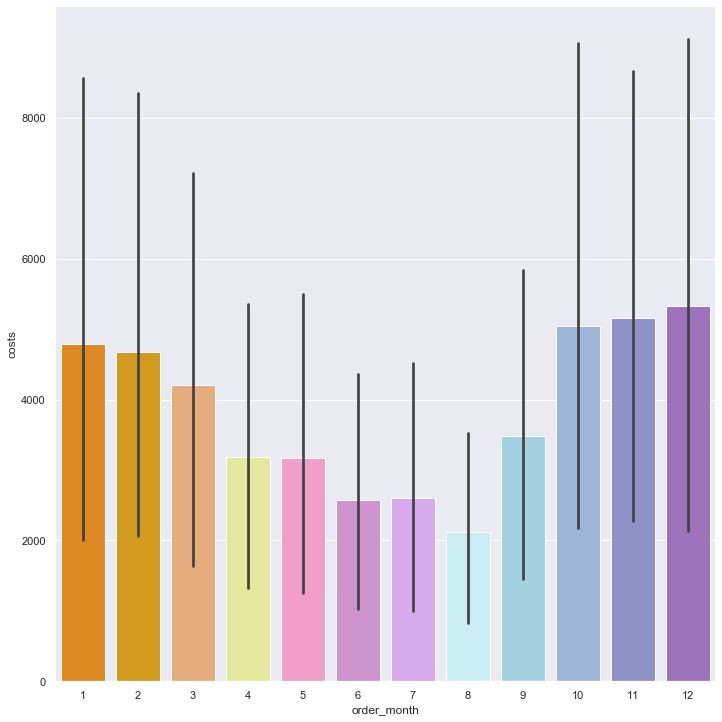

In [76]:
colors = {1:'#fd8c04',2:'#f0a500',3:'#f6ab6c',4:'#edf492',5:'#fe91ca',9:\
          '#98d6ea',7:'#da9ff9',6:'#d789d7',12:'#9d65c9',11:'#848ccf',10:'#93b5e1',
         8:'#c2f0fc'}

sns.catplot(x="order_month", y="costs",kind="bar",data=expenses ,height=10,palette=colors)
#ax.set_title("Expences")

In the Expenses graph, we see that August was the month of the least expenses. The busiest months are the pre-holiday season. It is essential to point out that perhaps the reason for fewer spendings on marketing for the summer months is connected to natural demand. As per the marketing and business rules, advertising has to keep going as presence is essential regardless of the competition, so it is not brought to zero. If the demand is increased and Yandex being the largest internet service and search engine in Russia, it makes sense that people would turn to Afisha for searching and buying tickets.

In [77]:
orders_log['order_month'] = orders_log['order_date'].astype('datetime64[M]')
costs['month'] = costs['date'].astype('datetime64[M]')
 
first_orders = orders_log.groupby('user_id').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['user_id', 'first_order_month']
cohort_sizes = first_orders.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 
 
margin_rate = .4 # As we have done in the theory
 
orders_ = pd.merge(orders_log,first_orders, on='user_id')
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,1537,2017-06-01,9264.75
1,2017-06-01,1537,2017-07-01,958.66
2,2017-06-01,1537,2017-08-01,861.66
3,2017-06-01,1537,2017-09-01,1901.51
4,2017-06-01,1537,2017-10-01,2022.82


There is one month where the revenue was very high relative to another month, yet, on other graphs, we see that the month in question was not incredibly busy in terms of visits and orders. This project does not have the information on the purchases' nature, but it is still worth noting.

In [78]:
#calculating gross profit 
#margin rate that was adviced by Anastsia to use
margin_rate = 0.4

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,1537,2017-06-01,9264.75,3705.900,0
1,2017-06-01,1537,2017-07-01,958.66,383.464,1
2,2017-06-01,1537,2017-08-01,861.66,344.664,2
3,2017-06-01,1537,2017-09-01,1901.51,760.604,3
4,2017-06-01,1537,2017-10-01,2022.82,809.128,4


Subsequently, the gross profit is higher for that month as well.

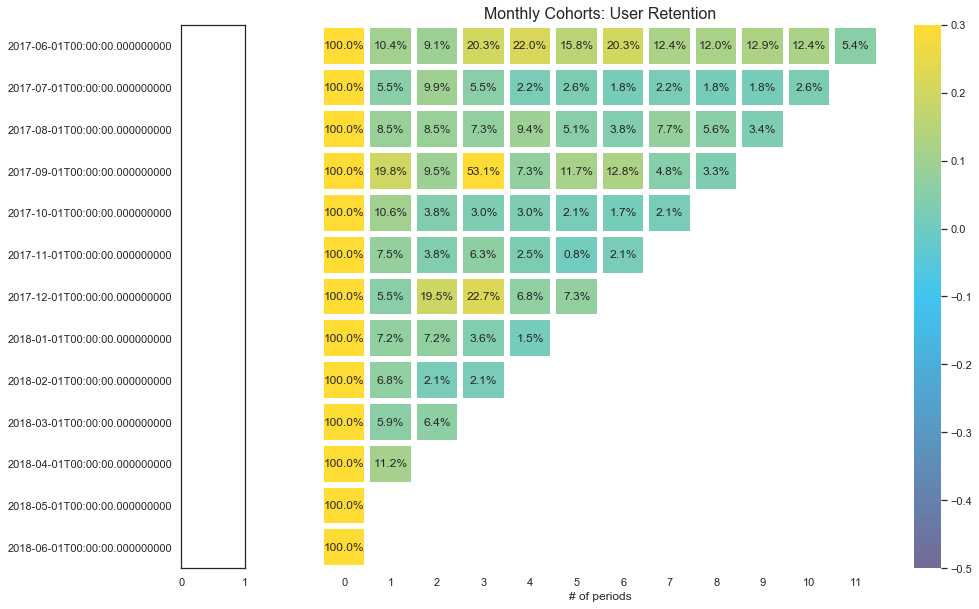

In [79]:
report['ltv'] = report['gp'] / report['n_buyers']
 
result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round()
 
result.fillna('')

monthly_costs = costs.groupby('date').sum().reset_index()
#monthly_costs.head(6) 
report_2 = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='date')
report_2['cac'] = report_2['costs'] / report_2['n_buyers']
report_2.head() 


result_ltv = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round(2)

result_ltv.fillna('')

cohort_size = result_ltv.iloc[:,0]
retention_matrix = result_ltv.divide(cohort_size, axis = 0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(15, 10), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    def create_color(r, g, b):
        return [r/256, g/256, b/256]
 
    def get_custom_color_palette():
        return LinearSegmentedColormap.from_list("", ['#726a95','#3fc5f0','#ffdc34'
 
])    
    
    # retention matrix
    cmap = get_custom_color_palette() 
    sns.heatmap(retention_matrix,  
                annot=True, 
                fmt='.1%', 
                cmap=cmap,
                linewidths=5,
                vmin=-0.5, vmax=0.3,
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

On the heatmap, we see three outliers, one for 2017-12-01 and another one for 2017-09-01, which can be attributed to the City Day in Moscow, given that Yandex Afisha has one of their biggest audience there. An outlier for the first cohort can be attributed to pleasant weather in June and the potential for events happening outdoors. 

In [80]:
month_6_cum_ltv = result_ltv.cumsum(axis=1).mean(axis=0)[5]
print('Average LTV for 6 months from the first order:', month_6_cum_ltv)

Average LTV for 6 months from the first order: 3.6857142857142864


In [81]:
ltv_6 = result_ltv.loc['2017-06-01'].sum()
ltv_7 = result_ltv.loc['2017-07-01'].sum()
ltv_8 = result_ltv.loc['2017-08-01'].sum()
ltv_9 = result_ltv.loc['2017-09-01'].sum()
ltv_10 = result_ltv.loc['2017-10-01'].sum() 
ltv_11 = result_ltv.loc['2017-11-01'].sum()

In [82]:
ltv_data = [['2017-06-01', 6.10], ['2017-07-01', 3.71], ['2017-08-01',3.73],['2017-09-01',6.07],['2017-10-01',2.98],['2017-11-01',2.94]] 
  
# Create the DataFrame 
ltv_months = pd.DataFrame(ltv_data, columns = ['date', 'value_month']) 
ltv_months['date'] = ltv_months['date'].astype('datetime64[M]')
ltv_months['month'] = ltv_months['date'].dt.month 

#ltv_months.info() #test

LTV Distribution Per Each Cohort Age


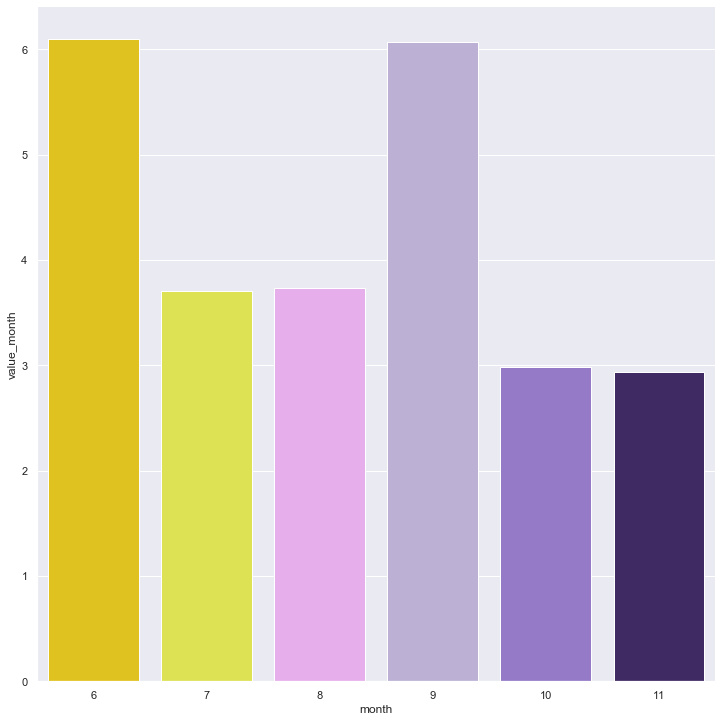

In [83]:
colors = {6:'#ffd800',7:'#f1fa3c',8:'#eea5f6',9:'#baabda',10:'#916dd5',11:'#3e206d'}

sns.catplot(x= "month", y= "value_month",kind="bar",data=ltv_months ,height=10,aspect=1,palette=colors)
 
print("LTV Distribution Per Each Cohort Age")    
    

In [84]:
average_cohort_LTV = result_ltv.cumsum(axis=1).mean(axis=0).reset_index()
average_cohort_LTV.rename(columns = {0:'values'}, inplace=True)
average_cohort_LTV

,age,values
0,0,2.238462
1,1,2.518182
2,2,2.719000
3,3,3.090000
4,4,3.376250
5,5,3.685714
6,6,3.885000
7,7,4.218000
8,8,4.667500
9,9,4.346667


Average Cohort LTV Visualization


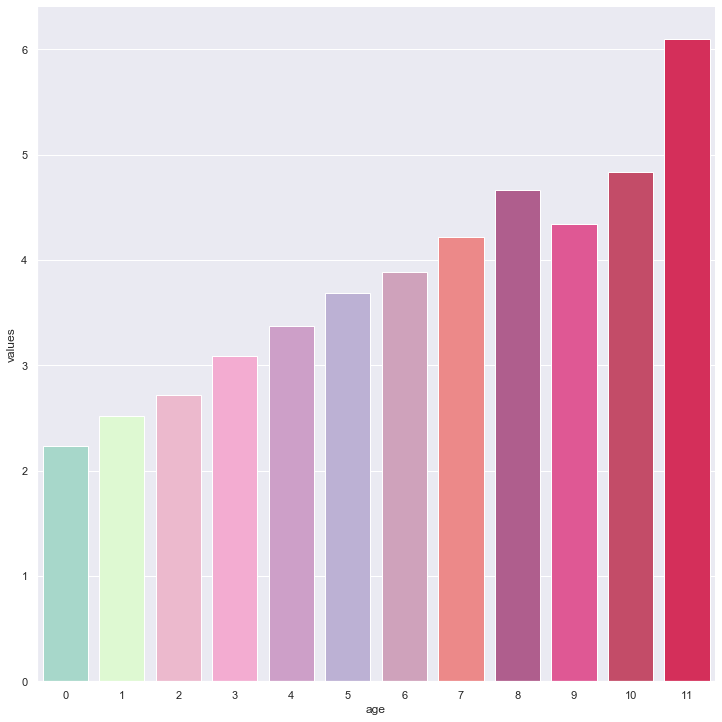

In [85]:
colors = {6:'#d79abc',5:'#baabda',0:'#9fdfcd',1:'#dcffcc',2:'#f5b0cb',4:'#d597ce',\
          3:'#ffa0d2',8:'#bc5090',7:'#fc7978',9:'#f54291',11:'#f0134d',10:'#d7385e'}

sns.catplot(x="age", y="values",kind="bar",data=average_cohort_LTV ,height=10,palette=colors)
print("Average Cohort LTV Visualization")

#### Conclusion on LTV

The amount brought in revenue is not significant. However, given the fact that Yandex Afisha gets a percentage out of ticket sales that are not directly advertised on the platform but rather suggested to the user, it is not that critical. The products' marketing is their presentation on the website in a way a particular theater or a gallery would prefer them to be. In other words, the only heavy-lifting component of the marketing of the products presented on the website is website optimization for multiple devices. What is interesting is that June brought the most significant revenue.

In [86]:
costs[costs['dt'] == '2017-06-01']['costs'].sum()

735.26

In [87]:
report[report['first_order_month'] == '2017-06-01']['n_buyers'][0]

1537

In [88]:
#steps to calculate cac
#finding the cohort
cohort_20170601 = report[report['first_order_month'] == '2017-06-01']

#calculating the costs
costs_20170601 = costs[costs['dt'] == '2017-06-01']['costs'].sum()

n_buyers_20170601 = report[report['first_order_month'] == '2017-06-01']['n_buyers'][0]
cac_20170601 = costs_20170601 / n_buyers_20170601
ltv_20170601 = result.loc['2017-06-01'].sum()

print('CAC =',cac_20170601)
print('LTV =',ltv_20170601)

CAC = 0.47837345478204296
LTV = 3.0


Based on the results, a relatively small amount should be spent on customer acquisition while the customer value demonstrates the success of the model's financial side. 

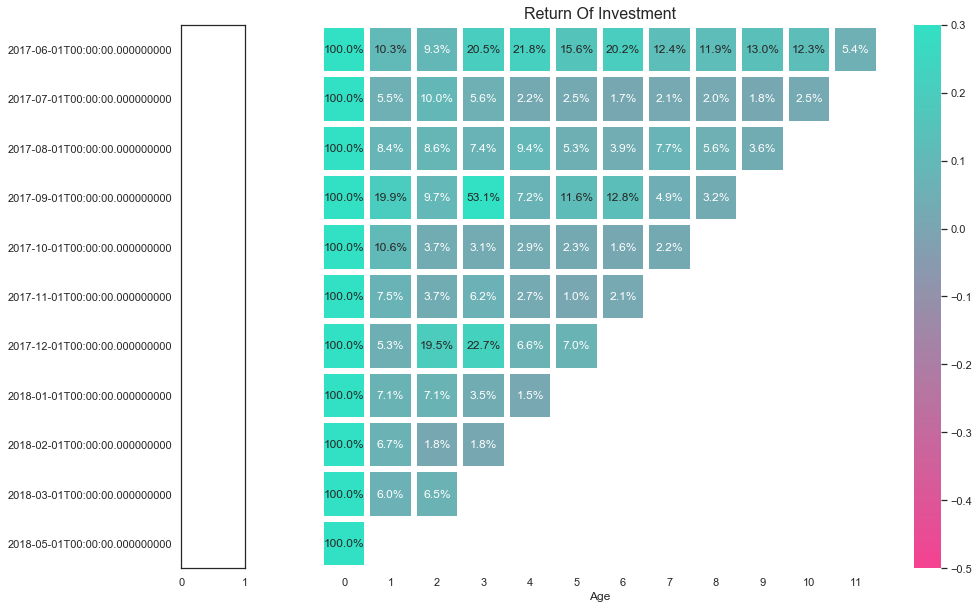

In [89]:
report_2['romi'] = report_2['ltv'] / report_2['cac']
output = report_2.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')


cohort_size = output.iloc[:,0]
retention_matrix = output.divide(cohort_size, axis = 0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(15, 10), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    def create_color(r, g, b):
        return [r/256, g/256, b/256]
 
    def get_custom_color_palette():
        return LinearSegmentedColormap.from_list("", ['#f54291','#32e0c4'
 
])    
    
    # retention matrix
    cmap = get_custom_color_palette()     
    # retention matrix
    sns.heatmap(retention_matrix,  
                annot=True, 
                fmt='.1%', 
                cmap=cmap,
                linewidths=5,
                vmin=-0.5, vmax=0.3,
                ax=ax[1])
    ax[1].set_title('Return Of Investment', fontsize=16)
    ax[1].set(xlabel='Age',
              ylabel='')
#output.cumsum(axis=1).round(2) 

In [90]:
month_6_cum_romi = output.cumsum(axis=1).mean(axis=0)[5]
print('Average ROMI for 6 months from the first order:',month_6_cum_romi)

Average ROMI for 6 months from the first order: 11.979082824852371


The investment return shows a pretty clear pattern in terms of when events are happening in Russia and where the service is most needed. In May, the investment comes around the middle of the months because many events are happening during the May holidays, and tickets are being sold, so we see the spike right after in this cohort.

In June, a similar thing.

Even though August is not a busy month overall, the search volume is significantly lower; August has shown to bring a significant return of investment. In this case, the smaller volume does not mean a lack of interest but rather a lack of seasonal need. Still, the advertising efforts were adjusted accordingly, which yielded into better profit. 

In [91]:
average_cohort_romi = output.cumsum(axis=1).mean(axis=0).reset_index()
average_cohort_romi.rename(columns = {0:'values'}, inplace=True)
average_cohort_romi

,age,values
0,0,7.300064
1,1,7.780024
2,2,8.386955
3,3,9.897642
4,4,10.997549
5,5,11.979083
6,6,12.424716
7,7,13.671314
8,8,14.871498
9,9,12.297574


Average Cohort Romi Visualization


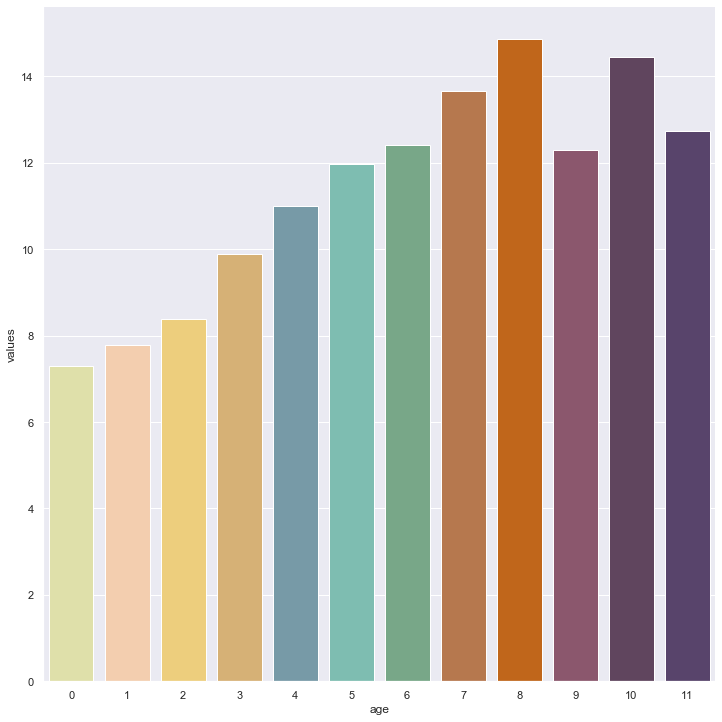

In [92]:
colors = {6:'#70af85',3:'#e6b566',0:'#e8e9a1',10:'#654062',2:'#ffd66b',\
          7:'#c7753d',5:'#a9294f',4:'#6f9eaf',5:'#74c7b8',1:'#ffcda3',9:'#944e6c',\
         8:'#db6400',11:'#583d72'}

sns.catplot(x="age", y="values",kind="bar",data=average_cohort_romi ,height=10,palette=colors)
print("Average Cohort Romi Visualization")

The return of investment varies considerably based on the period. Perhaps there are other factors involves, such as the type of product offered through the service.

### Conclusion  <a name="conclusion5"></a>

In terms of marketing efforts, the model is successful, given that the return of investment is high, which is good, and the revenue and GP are significant. It is not clear what aspect of the service draws the most customers because we do not have sufficient data; however, what is essential is that the return of investment is still significant even during less successful months.

## Step 3. Testing Hypothesis  <a name="hypothesis"></a>

### Hypothesis formulation:

Null hypothesis - that the duration of visits from different types of device is equal

Alternative hypothesis - they are not equal

In this case, I chose a relatively small alpha because, most likely, the duration of visits will not be equal. Several factors may attribute, such as when people browse the internet from each type of device and the level of comfort while using the interface. For example, people are more likely to browse from their phones during the morning or evening hours between getting ready for work or during transit. Also, some people prefer ordering from the desktop because the screen size makes it easier for them to go through the payment process. 

Rejecting the null hypothesis


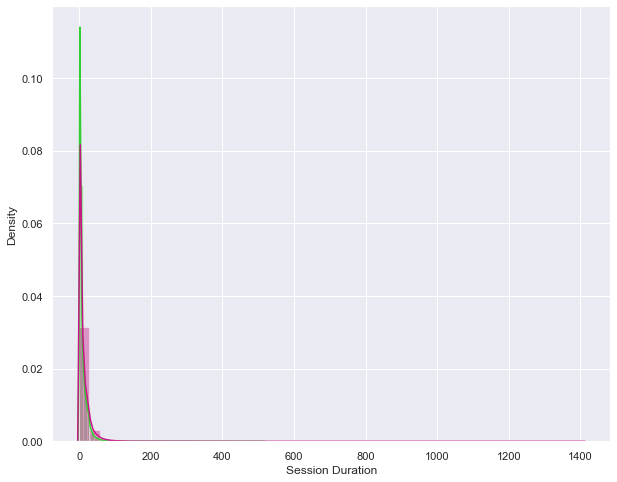

In [93]:
visits_duration_min = visits_log[visits_log['session_duration_min'] > 0]
visits_touch = visits_duration_min[visits_duration_min['device'] == 'touch']
visits_desktop = visits_duration_min[visits_duration_min['device'] == 'desktop']

touch_visits_duration = visits_touch['session_duration_min'] 
desktop_visits_duration = visits_desktop['session_duration_min']

plt.figure(figsize=(10,8))
x = pd.Series(touch_visits_duration, name="Session Duration") 
ax = sns.distplot(x,color='LimeGreen')
x = pd.Series(desktop_visits_duration, name="Session Duration") 
ax = sns.distplot(x,color='MediumVioletRed',)


alpha = 0.05 #there is not a huge possibility that the duration from different devices will be the same

results = st.ttest_ind(
        touch_visits_duration,
        desktop_visits_duration)

if (results.pvalue != alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")# Test the hypothesis

### Conclusion <a name="conclusion6"></a>

We reject the null hypothesis which confirms my suspition that the duration of interactions through desktop and mobile devices would differ.

## Project Conclusion <a name="conclusion7"></a>

After analyzing Yandex Afisha, we can conclude that the platform does not have a significant profit but does not have substantial spendings relative to the outcome, which makes the strategy balanced. Here it is essential to consider that Yandex Afisha is a product within the Yandex ecosystem and its usefulness for the consumer is more significant than the profit. People can use the quality service as the most convenient aggregator source from their home, with the Yandex brand outlook helps to dictate presence. 

The fluctuations in revenue and spending on advertising are connected to seasonal changes. People spend more during the times when theaters, exhibitions, etc. are not on a break. Spikes occur during holidays when people have days off, but they cannot (for the most part) take an extended vacation and travel somewhere. What is also worth noting is that despite a lower volume of users visiting the page, the revenue goes up. Here it would help to understand what particular event caused the spike that would require additional research. 

People overwhelmingly prefer accessing the service from their desktops. The platform is optimized for mobile devices and has an excellent responsive design, but perhaps it is easier for people to make purchases from bigger screens where there is less of a chance to make a mistake.